In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import cov
import seaborn as sns
import random
diamonddf = pd.read_csv('diamonds.csv')


In [9]:
diamonddf.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
diamonddf.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.info()

AttributeError: 'Series' object has no attribute 'info'

In [2]:
diamonddf = diamonddf.drop('Unnamed: 0', 1)
df = diamonddf.sample(frac = 1)
df = df[df['price'] <= 10000]

<AxesSubplot:title={'center':'Diamond Carat VS Diamond Price'}, xlabel='price', ylabel='carat'>

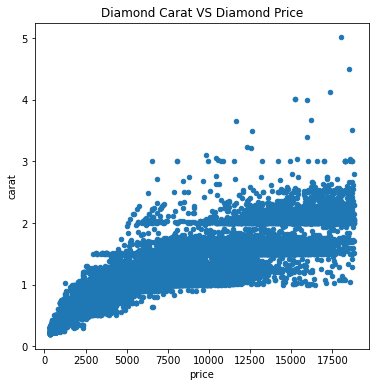

In [6]:
diamonddf.plot.scatter('price', 'carat', figsize =(6,6), title = "Diamond Carat VS Diamond Price")

In [75]:
def price_nonum_characteristic(column, sample_size, max_price):
    df = diamonddf.sample(frac = sample_size)
    df = df[df['price'] <= max_price]
    df2 = df.groupby(column).mean()
    df2.plot.bar(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()

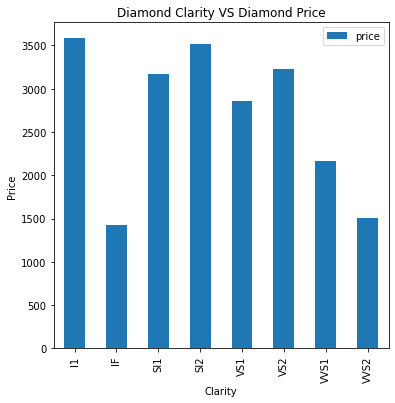

In [76]:
price_nonum_characteristic('clarity', 0.01, 10000)

In [59]:
def price_num_characteristic(column, sample_size, max_price):
    df = diamonddf.sample(frac = sample_size)
    df = df[df['price'] <= max_price]
    df2 = df.groupby(column).mean()
    df2.plot(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()


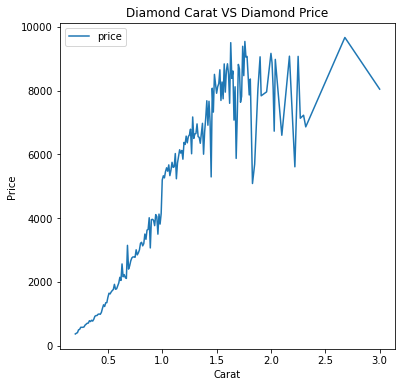

In [60]:
price_num_characteristic('carat', 0.25, 10000)

In [7]:
class Graph:
    def __init__(self,input_df, sample_size, max_price):
        df = input_df.drop('Unnamed: 0', 1)
        df= df.sample(frac = sample_size)
        df = df[df['price'] <= max_price]  

    #Function to create bar plot for non numerical characteristics
    def price_nonum_characteristic(self, column):
        df2 = df.groupby(column).mean()
        df2.plot.bar(y='price', figsize=(8,8),title=('Diamond {} VS Diamond Average Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
        return plt.show()

    ##Function to create plot for numerical characteristics
    def price_num_characteristic(column, sample_size, max_price):
        df = diamonddf.sample(frac = sample_size)
        df = df[df['price'] <= max_price]
        df2 = df.groupby(column).mean()
        df2.plot(y='price', figsize=(8,8),title=('Diamond {} VS Diamond Average Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
        return plt.show()



In [3]:
price_nonum_characteristic('cut', 1, 10000)

NameError: name 'price_nonum_characteristic' is not defined

In [65]:
diamonddf.sort()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [7]:
def prep_df(input_df,sample_size, max_price):
    df = input_df.drop('Unnamed: 0', 1)
    df= df.sample(frac = sample_size)
    df = df[df['price'] <= max_price]  
    return df


In [8]:
df3 = prep_df(diamonddf, 1, 10000)

In [96]:
def price_nonum_characteristic(column):
    df2 = df.groupby(column).mean()
    df2.plot.bar(y='price', figsize=(6,6),title=('Diamond {} VS Diamond Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()

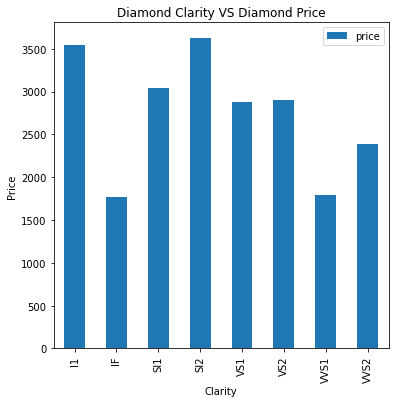

In [97]:
price_nonum_characteristic('clarity')

In [9]:
df3

,carat,cut,color,clarity,depth,table,price,x,y,z
36480,0.43,Very Good,G,VS1,60.9,57.0,943,4.88,4.91,2.98
29213,0.31,Ideal,F,VS1,61.2,57.0,695,4.36,4.39,2.68
31693,0.40,Ideal,H,SI1,61.7,56.0,770,4.72,4.77,2.93
4681,0.82,Premium,G,SI1,61.8,58.0,3674,6.02,5.98,3.71
4654,1.00,Fair,F,SI1,66.7,57.0,3669,6.07,5.99,4.02
...,...,...,...,...,...,...,...,...,...,...
14473,1.17,Ideal,D,SI2,62.7,57.0,5842,6.70,6.72,4.21
19927,1.56,Premium,J,VS1,61.1,59.0,8476,7.52,7.49,4.58
11631,1.00,Very Good,E,SI1,63.3,57.0,5051,6.30,6.36,4.01
14883,1.04,Ideal,H,VS2,61.8,55.0,5994,6.51,6.52,4.03


<AxesSubplot:>

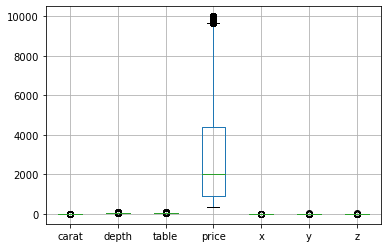

In [13]:
df.boxplot()

<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

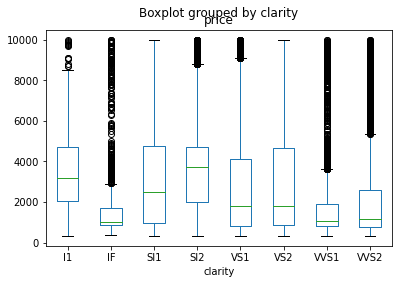

In [12]:
over1 = diamonddf[diamonddf['carat'] > 3.0]

In [26]:
over1

,carat,cut,color,clarity,depth,table,price,x,y,z
19339,3.01,Premium,I,I1,62.7,58.0,8040,9.10,8.97,5.67
21758,3.11,Fair,J,I1,65.9,57.0,9823,9.15,9.02,5.98
21862,3.01,Premium,F,I1,62.2,56.0,9925,9.24,9.13,5.73
22428,3.05,Premium,E,I1,60.9,58.0,10453,9.26,9.25,5.66
22540,3.02,Fair,I,I1,65.2,56.0,10577,9.11,9.02,5.91
22741,3.01,Fair,H,I1,56.1,62.0,10761,9.54,9.38,5.31
23644,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38
24131,3.24,Premium,H,I1,62.1,58.0,12300,9.44,9.40,5.85
24297,3.22,Ideal,I,I1,62.6,55.0,12545,9.49,9.42,5.92
24328,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03


In [27]:
diamonddf['color']

0        E
1        E
2        E
3        I
4        J
        ..
53935    D
53936    D
53937    D
53938    H
53939    D
Name: color, Length: 53940, dtype: object

In [64]:
def price_nonum_characteristic(column, sample_size, max_price):
    df = diamonddf.sample(frac = sample_size)
    df = df[df['price'] <= max_price]
    df2 = df.sort_values(['price', column], ascending=False).groupby(column).mean()
    df2.plot(y='price', figsize=(8,8),title=('Diamond {} VS Diamond Average Price'.format(column.capitalize())), xlabel=column.capitalize(), ylabel='Price')
    return plt.show()

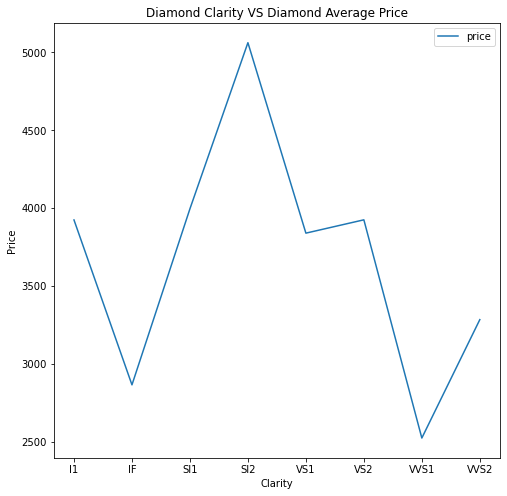

In [66]:
price_nonum_characteristic('clarity', 1 ,100000)

In [90]:
f2 = df.sort_values(['price', 'clarity'], ascending=True).groupby('clarity').mean()

In [91]:
f2

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.205373,62.741069,58.301969,3547.295359,6.655316,6.603966,4.141421
IF,0.429741,61.515475,56.416954,1772.660912,4.771887,4.793348,2.941153
SI1,0.754803,61.871400,57.618004,3038.083915,5.698584,5.699556,3.524878
SI2,0.922024,61.778378,57.897410,3627.663231,6.127432,6.120510,3.780752
VS1,0.639250,61.682328,57.263982,2872.396552,5.379042,5.389877,3.323684
VS2,0.666570,61.732171,57.360263,2895.670359,5.452779,5.454823,3.366324
VVS1,0.447975,61.637735,56.853991,1786.595951,4.819234,4.834067,2.975317
VVS2,0.524231,61.661400,57.015800,2381.840052,5.040509,5.054384,3.111504


In [84]:
diamonddf =diamonddf.drop('y', 1)

In [85]:
diamonddf =diamonddf.drop('z', 1)


In [89]:
diamonddf.sort_values(['price'], ascending=False).groupby('clarity').mean()

,carat,depth,table,price
clarity,,,,
I1,1.283846,62.734278,58.303779,3924.168691
IF,0.505123,61.510615,56.507207,2864.839106
SI1,0.850482,61.853042,57.662541,3996.001148
SI2,1.077648,61.772167,57.927181,5063.028606
VS1,0.727158,61.667458,57.315151,3839.455391
VS2,0.763935,61.724417,57.417401,3924.989395
VVS1,0.503321,61.624651,56.884460,2523.114637
VVS2,0.596202,61.663778,57.024990,3283.737071


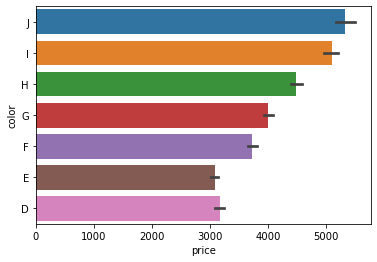

In [5]:
diamonddf['color']
ax = sns.barplot(x= 'price', y='color', data=diamonddf,
                order =['J','I','H','G','F','E','D'])